<a href="https://colab.research.google.com/github/andraroman12/PMP-2024/blob/main/Lab6/lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Media a posteriori a lui λ: 16.4545
Modul a posteriori al lui λ: 16.3668
Intervalul HDI de 94% pentru λ: [14.2348, 18.7992]



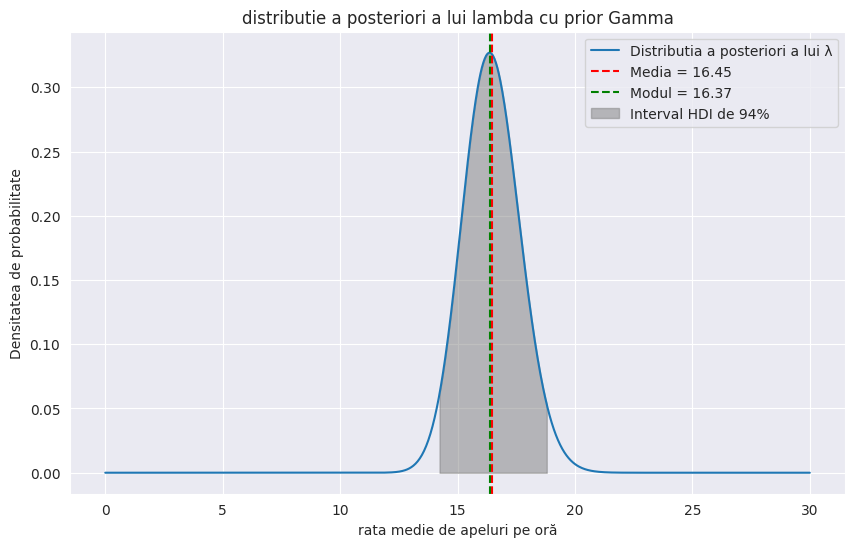

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


k = 180
T = 10

alpha_prior = 1
beta_prior = 1

lambda_values = np.linspace(0.001, 30, 1000)

prior_pdf = stats.gamma.pdf(lambda_values, a=alpha_prior, scale=1/beta_prior)

likelihood = stats.poisson.pmf(k, mu=T * lambda_values)

unnormalized_posterior = likelihood * prior_pdf
posterior_pdf = unnormalized_posterior / np.trapz(unnormalized_posterior, lambda_values)


mean_lambda = np.trapz(lambda_values * posterior_pdf, lambda_values)


mode_index = np.argmax(posterior_pdf)

mode_lambda = lambda_values[mode_index]

cumulative = np.cumsum(posterior_pdf) * (lambda_values[1] - lambda_values[0])
lower_index = np.where(cumulative >= 0.03)[0][0]
upper_index = np.where(cumulative <= 0.97)[0][-1]
lower_bound = lambda_values[lower_index]
upper_bound = lambda_values[upper_index]


print(f"Media a posteriori a lui λ: {mean_lambda:.4f}")
print(f"Modul a posteriori al lui λ: {mode_lambda:.4f}")
print(f"Intervalul HDI de 94% pentru λ: [{lower_bound:.4f}, {upper_bound:.4f}]\n")


plt.figure(figsize=(10, 6))
plt.plot(lambda_values, posterior_pdf, label='Distributia a posteriori a lui λ')
plt.axvline(mean_lambda, color='r', linestyle='--', label=f'Media = {mean_lambda:.2f}')
plt.axvline(mode_lambda, color='g', linestyle='--', label=f'Modul = {mode_lambda:.2f}')
plt.fill_between(lambda_values, posterior_pdf, where=(lambda_values >= lower_bound) & (lambda_values <= upper_bound), color='gray', alpha=0.5, label='Interval HDI de 94%')
plt.title('distributie a posteriori a lui lambda cu prior Gamma')
plt.xlabel('rata medie de apeluri pe oră')
plt.ylabel('Densitatea de probabilitate')
plt.legend()
plt.grid(True)
plt.show()